In [ ]:
"""
    Instruções:
        1- Responda as perguntas listadas no README.md;
        2- Faça as análises que julgar necessárias e deixe os resultados de suas análises plotadas no notebook.
"""

# Importação das Bibliotecas=

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Qual a área total desmatada em hectares no estado de Minas Gerais em cada um dos meses de agosto e setembro de 2022?

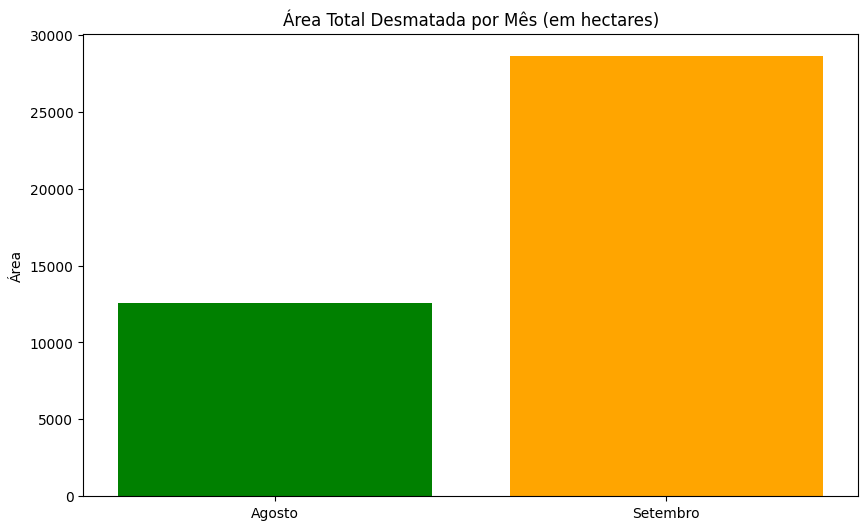

In [12]:
# Carregando os dados
desmatamento = gpd.read_file("dados/focos-desmatamento-mg.geojson")

# Convertendo a coluna de geometria para área em hectares
desmatamento["area_ha"] = desmatamento.geometry.area / 10000  # Convertendo de m² para ha

# Calculando a área total desmatada por mês
area_por_mes = desmatamento.groupby("mes")["area_ha"].sum()

# Plotando a área total desmatada
plt.figure(figsize=(10, 6))
plt.bar(["Agosto", "Setembro"], [area_por_mes["ago"], area_por_mes["set"]], color=['green', 'orange'])
plt.title("Área Total Desmatada por Mês (em hectares)")
plt.ylabel("Área")
plt.show()


# Qual a área total desmatada em km² no estado de Minas Gerais em todo o período fornecido (ago/set de 2022) por bioma?

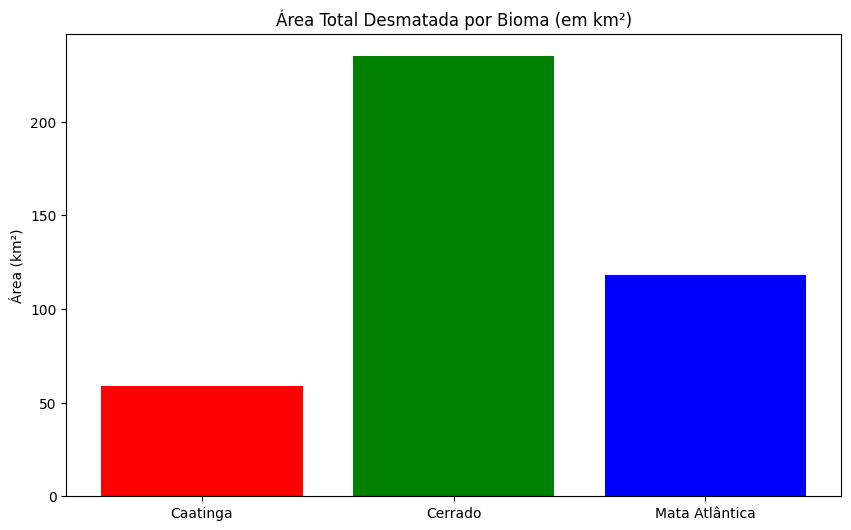

In [14]:
# Convertendo a coluna de geometria para área em km²
desmatamento["area_km2"] = desmatamento.geometry.area / 1000000  # Convertendo de m² para km²

# Calculando a área total desmatada em km² por bioma
area_por_bioma = desmatamento.groupby("bioma")["area_km2"].sum()

# Plotando a área total desmatada por bioma
plt.figure(figsize=(10, 6))
plt.bar(area_por_bioma.index, area_por_bioma.values, color=['red', 'green', 'blue'])
plt.title("Área Total Desmatada por Bioma (em km²)")
plt.ylabel("Área (km²)")
plt.show()

# Qual a área total desmatada em km² no estado de Minas Gerais em cada um dos meses de agosto e setembro de 2022, por município?

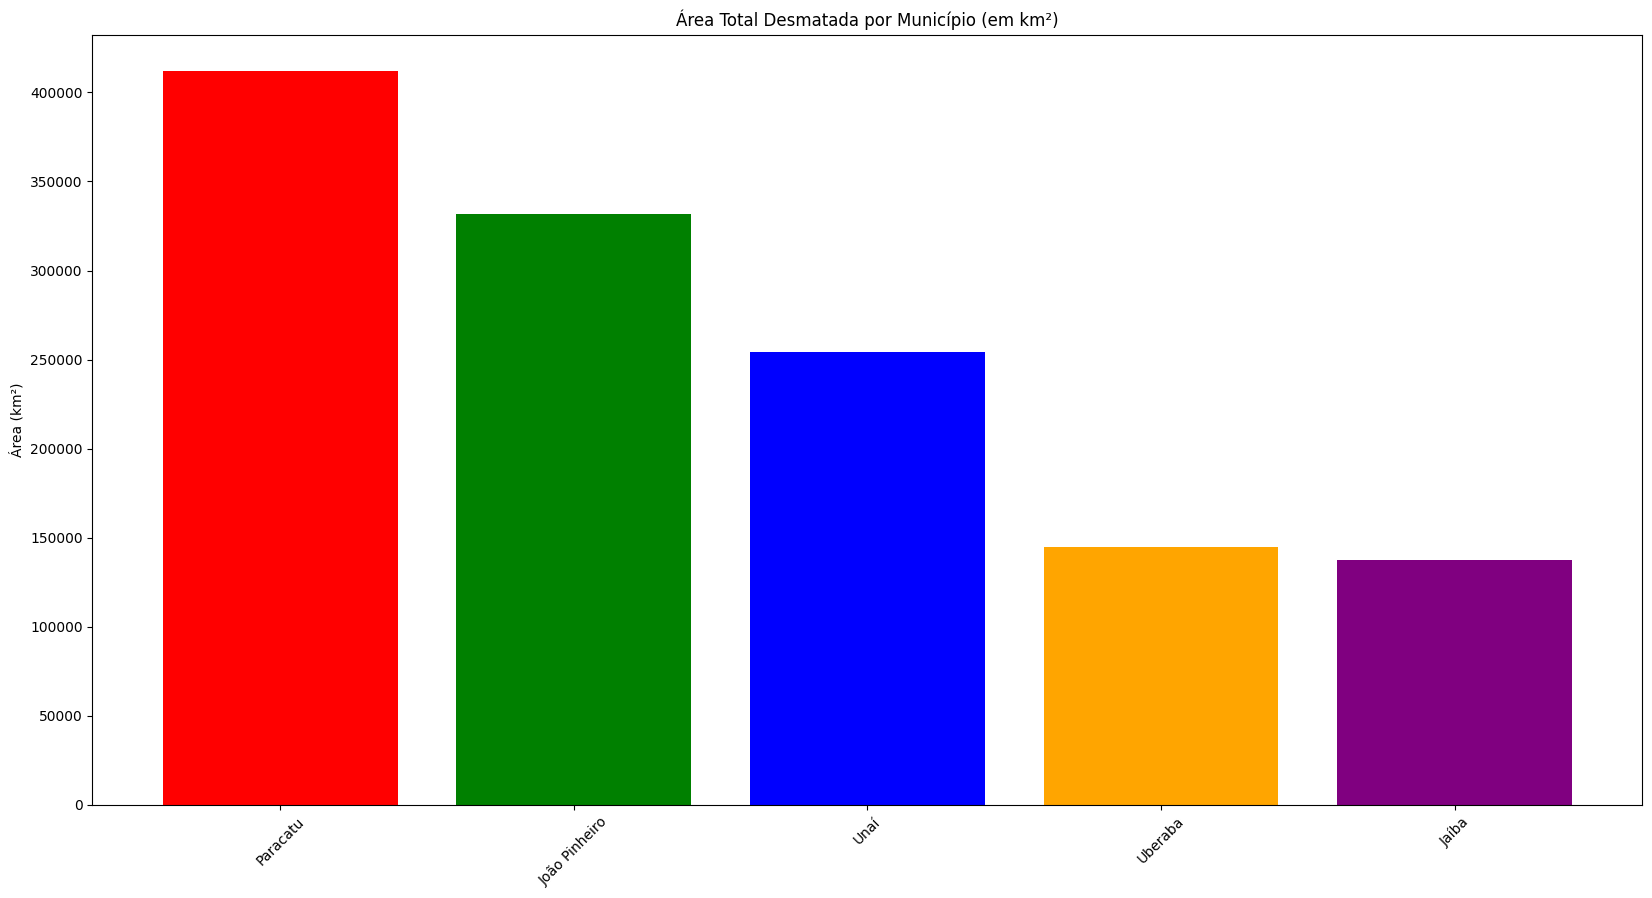

In [46]:
# Trazendo a lista de municípios
municipios = gpd.read_file("dados/municipios-mg-completo.geojson")

# Realizando a interseção espacial entre os dados de desmatamento e os municípios
municipios_com_desmatamento = gpd.overlay(
    municipios,
    desmatamento[["geometry", "area_km2"]],
    how="intersection",
)

# Calculando a área total desmatada por município
area_desmatada_por_municipio = municipios_com_desmatamento.groupby("municipio")["area_km2_1"].sum()

# Separar os 5 municípios com maior área desmatada
area_desmatada_por_municipio = area_desmatada_por_municipio.sort_values(ascending=False).head(5)

# Plotando a área total desmatada por município
plt.figure(figsize=(20, 10))
plt.bar(area_desmatada_por_municipio.index, area_desmatada_por_municipio.values, color=['red', 'green', 'blue', 'orange', 'purple'])
plt.title("Área Total Desmatada por Município (em km²)")
plt.ylabel("Área (km²)")
plt.xticks(rotation=45)
plt.show()

# Faça uma análise de correlação entre as variáveis de população e PIB dos municípios de Minas Gerais e a área desmatada em hectares. Apresente os resultados da forma que achar mais adequada.

🔍 ANÁLISE DE CORRELAÇÃO: População, PIB e Desmatamento
✅ 853 municípios carregados
🗺️ Realizando interseção espacial...
📊 Dataset final: 853 municípios
🌳 Municípios com desmatamento: 426

📈 MATRIZ DE CORRELAÇÃO:
----------------------------------------
                   populacao       pib  area_desmatada_ha
populacao           1.000000  0.048322           0.107724
pib                 0.048322  1.000000           0.065866
area_desmatada_ha   0.107724  0.065866           1.000000
🗺️ Realizando interseção espacial...
📊 Dataset final: 853 municípios
🌳 Municípios com desmatamento: 426

📈 MATRIZ DE CORRELAÇÃO:
----------------------------------------
                   populacao       pib  area_desmatada_ha
populacao           1.000000  0.048322           0.107724
pib                 0.048322  1.000000           0.065866
area_desmatada_ha   0.107724  0.065866           1.000000


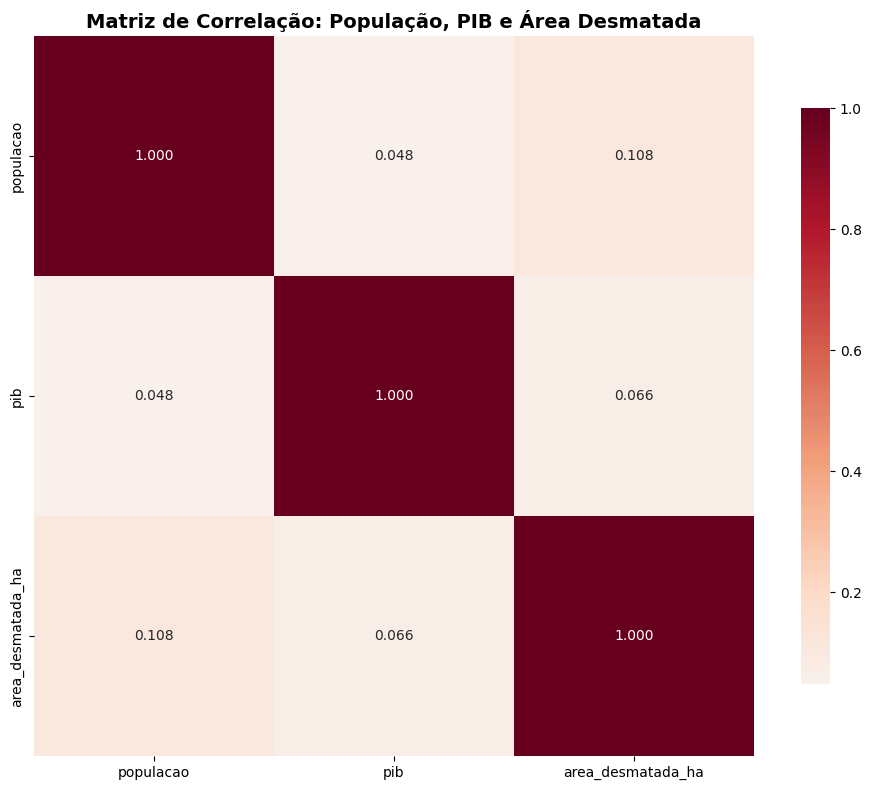

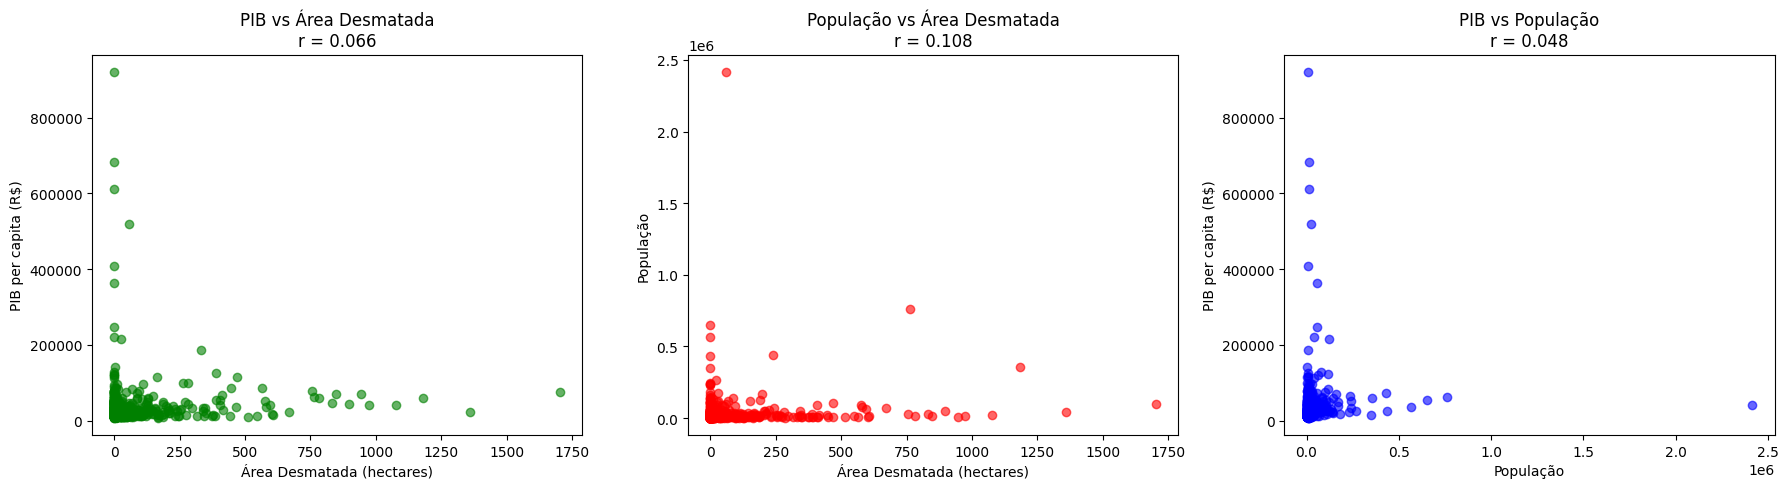


📝 RESUMO DAS CORRELAÇÕES:
-----------------------------------
• PIB vs Área Desmatada: 0.066
• População vs Área Desmatada: 0.108
• PIB vs População: 0.048

✅ Análise de correlação concluída!


In [5]:
print("🔍 ANÁLISE DE CORRELAÇÃO: População, PIB e Desmatamento")
print("=" * 60)

# 1. Carregando dados de municípios com PIB e população
municipios = gpd.read_file("dados/municipios-mg-completo.geojson")
print(f"✅ {len(municipios)} municípios carregados")

# 2. Carregando dados de desmatamento
desmatamento = gpd.read_file("dados/focos-desmatamento-mg.geojson")
municipios_geo = gpd.read_file("dados/municipios-mg.geojson")

# Convertendo área de desmatamento para hectares
desmatamento["area_desmatada_ha"] = desmatamento.geometry.area / 10000

# 3. Calculando área desmatada por município através de interseção espacial
print("🗺️ Realizando interseção espacial...")
desmat_municipios = gpd.overlay(municipios_geo, desmatamento[["geometry", "area_desmatada_ha"]], how="intersection")
area_por_municipio = desmat_municipios.groupby("municipio")["area_desmatada_ha"].sum().reset_index()

# 4. Combinando dados
merged = pd.merge(municipios, area_por_municipio, left_on='municipio', right_on='municipio', how='left')
merged['area_desmatada_ha'] = merged['area_desmatada_ha'].fillna(0)

print(f"📊 Dataset final: {len(merged)} municípios")
print(f"🌳 Municípios com desmatamento: {(merged['area_desmatada_ha'] > 0).sum()}")

# 5. MATRIZ DE CORRELAÇÃO (conforme exemplo solicitado)
print("\n📈 MATRIZ DE CORRELAÇÃO:")
print("-" * 40)

# Calculando correlação entre população, PIB e área desmatada
corr = merged[["populacao", "pib", "area_desmatada_ha"]].corr()
print(corr)

# 6. VISUALIZAÇÃO DA MATRIZ DE CORRELAÇÃO
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0, square=True, 
            fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação: População, PIB e Área Desmatada', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 7. GRÁFICOS DE DISPERSÃO
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PIB vs Área Desmatada
axes[0].scatter(merged['area_desmatada_ha'], merged['pib'], alpha=0.6, color='green')
axes[0].set_xlabel('Área Desmatada (hectares)')
axes[0].set_ylabel('PIB per capita (R$)')
axes[0].set_title(f'PIB vs Área Desmatada\nr = {corr.loc["pib", "area_desmatada_ha"]:.3f}')

# População vs Área Desmatada
axes[1].scatter(merged['area_desmatada_ha'], merged['populacao'], alpha=0.6, color='red')
axes[1].set_xlabel('Área Desmatada (hectares)')
axes[1].set_ylabel('População')
axes[1].set_title(f'População vs Área Desmatada\nr = {corr.loc["populacao", "area_desmatada_ha"]:.3f}')

# PIB vs População
axes[2].scatter(merged['populacao'], merged['pib'], alpha=0.6, color='blue')
axes[2].set_xlabel('População')
axes[2].set_ylabel('PIB per capita (R$)')
axes[2].set_title(f'PIB vs População\nr = {corr.loc["pib", "populacao"]:.3f}')

plt.tight_layout()
plt.show()

# 8. RESUMO DOS RESULTADOS
print("\n📝 RESUMO DAS CORRELAÇÕES:")
print("-" * 35)
print(f"• PIB vs Área Desmatada: {corr.loc['pib', 'area_desmatada_ha']:.3f}")
print(f"• População vs Área Desmatada: {corr.loc['populacao', 'area_desmatada_ha']:.3f}")
print(f"• PIB vs População: {corr.loc['pib', 'populacao']:.3f}")

print("\n✅ Análise de correlação concluída!")